## Projet 6 - Classifiez automatiquement des biens de consommation (extraction de features d'images via SIFT - Scale-Invariant Feature Transform)

# Préparation du dataset

## Import du dataset du fichier csv avec les descriptions des produits 

In [1]:
import pandas as pd
import os

# Définition du chemin relatif
file_path = os.path.join("..", "data", "flipkart_com-ecommerce_sample_1050.csv")

# Chargement du CSV dans un DataFrame
df = pd.read_csv(file_path)

# Affichage des premières lignes du df
df.head()


uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

### Import du dataset des images sous forme de fichiers jpg

Image: 009099b1f6e1e8f893ec29a7023153c4.jpg
 - Dimensions: (687, 1162)
 - Mode: RGB
------------------------------
Image: 0096e89cc25a8b96fb9808716406fe94.jpg
 - Dimensions: (1478, 904)
 - Mode: RGB
------------------------------
Image: 00cbbc837d340fa163d11e169fbdb952.jpg
 - Dimensions: (1347, 326)
 - Mode: RGB
------------------------------
Image: 00d84a518e0550612fcfcba3b02b6255.jpg
 - Dimensions: (1100, 857)
 - Mode: RGB
------------------------------
Image: 00e966a5049a262cfc72e6bbf68b80e7.jpg
 - Dimensions: (962, 1100)
 - Mode: RGB
------------------------------
Image: 00ed03657cedbe4663eff2d7fa702a33.jpg
 - Dimensions: (788, 2430)
 - Mode: RGB
------------------------------


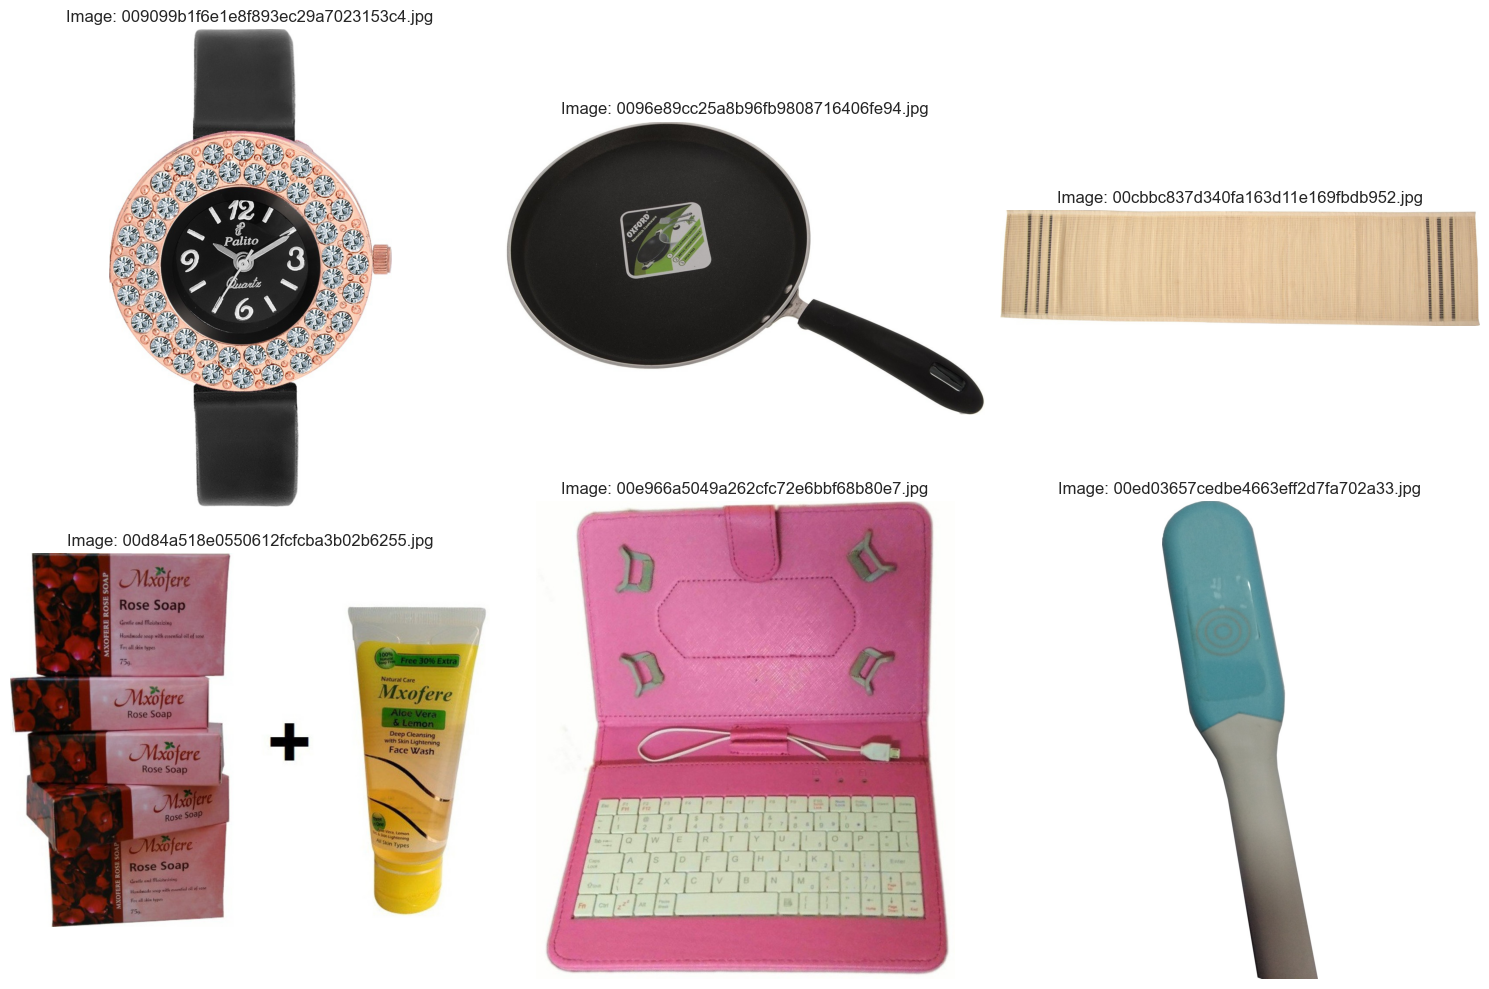

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Définition du chemin du dossier contenant les images
images_folder = os.path.join("..", "data", "Images")

# Liste de tous les fichiers dans le dossier
image_files = os.listdir(images_folder)

# Sélection des 6 premières images
selected_images = image_files[:6]

# Configuration de la figure pour afficher 6 images (2 lignes, 3 colonnes)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Chargement et affichage des informations sur chaque image
for i, image_name in enumerate(selected_images):
    image_path = os.path.join(images_folder, image_name)
    image = Image.open(image_path)
    
    # Affichage des informations sur l'image
    print(f"Image: {image_name}")
    print(f" - Dimensions: {image.size}")
    print(f" - Mode: {image.mode}")
    print("-" * 30)
    
    # Affichage de l'image dans la grille
    ax = axes[i // 3, i % 3]
    ax.imshow(image)
    ax.set_title(f"Image: {image_name}")
    ax.axis('off')  # Retourne les axes pour une meilleure présentation

# Affichage de la grille
plt.tight_layout()
plt.show()



## Pré-traitement des images

### Recuperation de la première catégorie de produits (Cibles)

In [3]:
# Affichage des valeurs uniques dans la colonne 'product_category_tree'
df['product_category_tree'].unique()

array(['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
       '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
       '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
       '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
       '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
       '["Watches >> Wrist Watches >> T

In [4]:
# Extrait la première catégorie de la colonne 'product_category_tree'
df['category'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0][2:-1])

# Mettre la catégorie en minuscules et dans une liste
df['category'] = df['category'].apply(lambda x: x.lower())

# Affichage des valeurs uniques dans la colonne 'category'
df['category'].unique()

array(['home furnishing', 'baby care', 'watches',
       'home decor & festive needs', 'kitchen & dining',
       'beauty and personal care', 'computers'], dtype=object)

In [5]:
# Affichage des premières lignes du DataFrame
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications         category  
0  {"product_specification"=>[{"key"=>"Brand", "v...  home furnishing  
1  {"product_specification"=>[{"key"=>"Machine Wa...        baby care  
2  {"product_specification"=>[{"key"=>"Material",...        baby care  
3  {"product_specification"=>[{"key"=>"Brand", "v...  home furnishing  
4  {"product_specification"=>[{"key"=>"Machine Wa...  home furnishing

### Création du dataframe pour les traitements des images

In [6]:
# Création d'un nouveau DataFrame avec les colonnes 'image' et 'category'
df_images = df.copy()
df_images = df_images[['image', 'category']]
df_images.head()

image         category
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  home furnishing
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        baby care
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        baby care
3  d4684dcdc759dd9cdf41504698d737d8.jpg  home furnishing
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  home furnishing

### Création des labels pour les catégories

In [7]:
from sklearn import preprocessing

# Initialisation de l'encodeur de labels
le = preprocessing.LabelEncoder()

# Ajuster et transformer la colonne 'category' pour créer une nouvelle colonne 'label'
df_images['label'] = le.fit_transform(df_images['category'])

# Affichage du DataFrame mis à jour avec la nouvelle colonne 'label'
df_images.head()

image         category  label
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  home furnishing      4
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        baby care      0
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        baby care      0
3  d4684dcdc759dd9cdf41504698d737d8.jpg  home furnishing      4
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  home furnishing      4

### Affichage d'exemples d'images par catégorie

Category: home furnishing


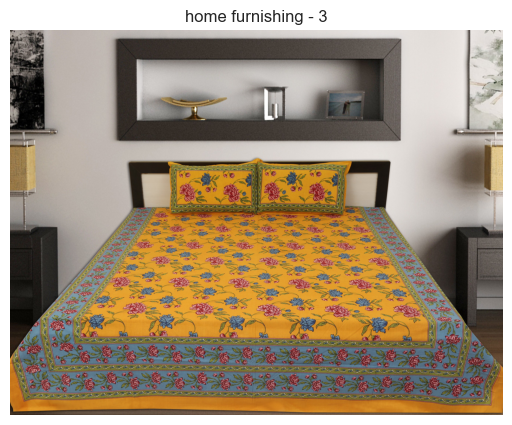

Category: baby care


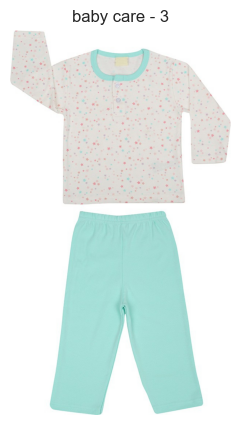

Category: watches


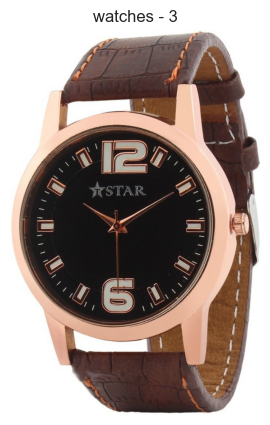

Category: home decor & festive needs


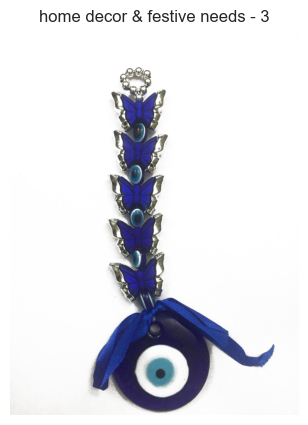

Category: kitchen & dining


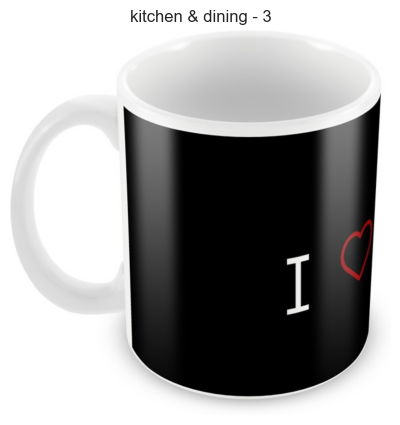

Category: beauty and personal care


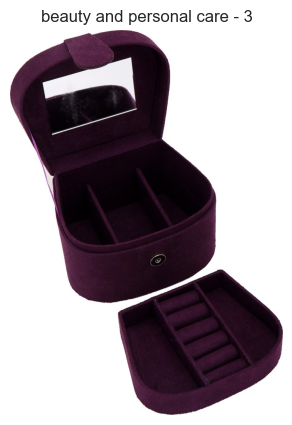

Category: computers


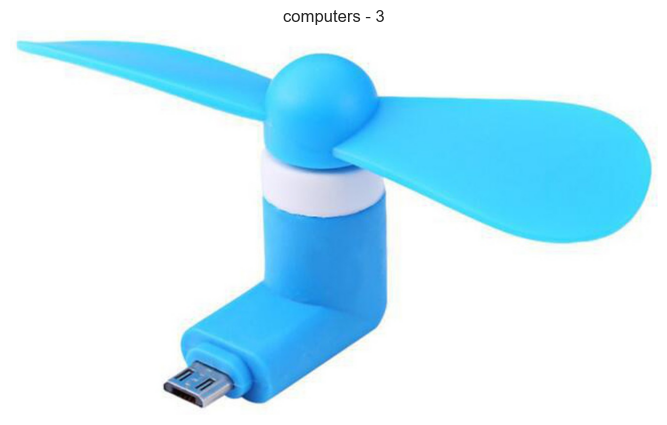

In [8]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os

# Définition du chemin relatif vers le répertoire des images
base_path = os.path.join("..", "data", "Images")

# Fonction pour obtenir la liste des noms de fichiers d'images pour une catégorie donnée
def get_images_by_category(category_name):
    return df_images[df_images['category'] == category_name]['image'].tolist() # tolist() pour obtenir une liste de noms de fichiers d'images pour la catégorie donnée

# Liste des catégories uniques
categories = df_images['category'].unique() # unique() pour obtenir les catégories uniques

# Affichage d'exemples d'images par catégorie
for category in categories:
    print(f"Category: {category}")
    
    # Obtenir la liste des noms de fichiers d'images pour cette catégorie
    images_list = get_images_by_category(category)
    
    # Affichage jusqu'à 3 images de cette catégorie
    plt.figure(figsize=(15, 5))
    for i in range(min(3, len(images_list))):
        # Construction du chemin relatif complet vers le fichier image
        image_file = os.path.join(base_path, images_list[i])
        if os.path.exists(image_file):  # Vérifiez si le fichier existe
            image = imread(image_file)
            plt.imshow(image)
            plt.title(f"{category} - {i+1}")
            plt.axis('off')
        else:
            print(f"File not found: {image_file}")
    plt.show()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir
import os

# Définir le chemin relatif vers le répertoire des images à partir de l'emplacement actuel du notebook
path = os.path.join("..", "data", "Images")

# Lister tous les fichiers dans le répertoire Images
list_photos = [file for file in listdir(path)]

# Afficher le nombre de photos trouvées
print(len(list_photos))

# Facultatif, afficher les premiers noms de fichiers pour vérification
print(list_photos[:5])


1050
['009099b1f6e1e8f893ec29a7023153c4.jpg', '0096e89cc25a8b96fb9808716406fe94.jpg', '00cbbc837d340fa163d11e169fbdb952.jpg', '00d84a518e0550612fcfcba3b02b6255.jpg', '00e966a5049a262cfc72e6bbf68b80e7.jpg']


### Nombre de photos par catégorie

In [10]:
from sklearn import preprocessing

# Initialiser l'encodeur de labels
le = preprocessing.LabelEncoder()

# Ajuster et transformer la colonne 'category' pour créer une nouvelle colonne 'label'
df_images['label'] = le.fit_transform(df_images['category'])

# Afficher le DataFrame mis à jour avec la nouvelle colonne 'label'
df_images.head()



image         category  label
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  home furnishing      4
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        baby care      0
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        baby care      0
3  d4684dcdc759dd9cdf41504698d737d8.jpg  home furnishing      4
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  home furnishing      4

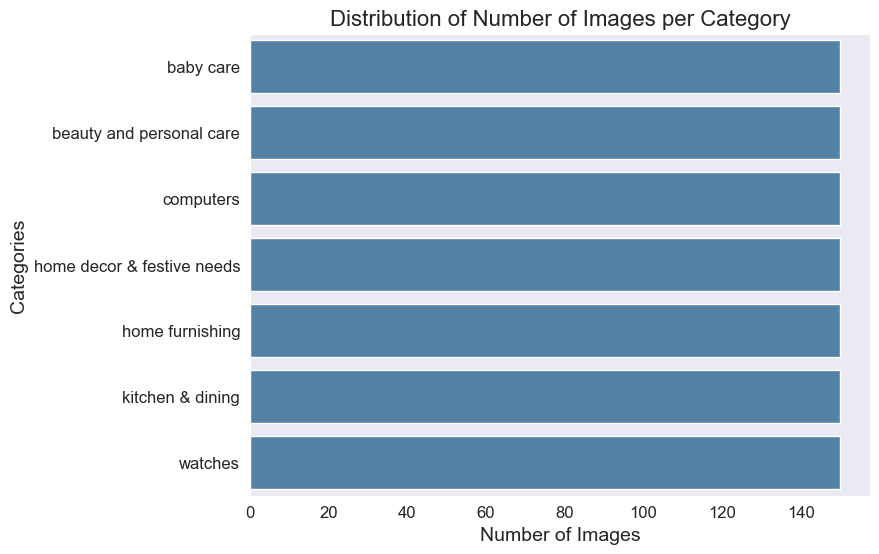

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir les catégories et compter le nombre d'images par catégorie
df_images_par_cat = df_images.groupby(['category', 'label']).agg({'image': 'count'}).reset_index()

# Tracé du nombre d'images par catégorie
plt.figure(figsize=(8, 6))  # Définir
sns.barplot(y=df_images_par_cat['category'], x=df_images_par_cat['image'], 
            data=df_images_par_cat, color='SteelBlue')

# Ajouter un titre et des étiquettes
plt.title("Distribution of Number of Images per Category", fontsize=16)
plt.xlabel("Number of Images", fontsize=14)
plt.ylabel("Categories", fontsize=14)

# Ajuster la taille de l'étiquette de la graduation
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Supprimer la grille pour un aspect plus propre
plt.grid(False)

# Afficher le tracé
plt.show()


In [12]:
# Vérifier la distribution des images par catégorie
df_images_par_cat['category'].value_counts()
df_images_par_cat

category  label  image
0                   baby care      0    150
1    beauty and personal care      1    150
2                   computers      2    150
3  home decor & festive needs      3    150
4             home furnishing      4    150
5            kitchen & dining      5    150
6                     watches      6    150

### Observation des catégories d'images :
- La répartition des catégories d'images est parfaitement équilibrée, avec 150 images par catégorie. 

## Création des labels des photos à partir du nom des images

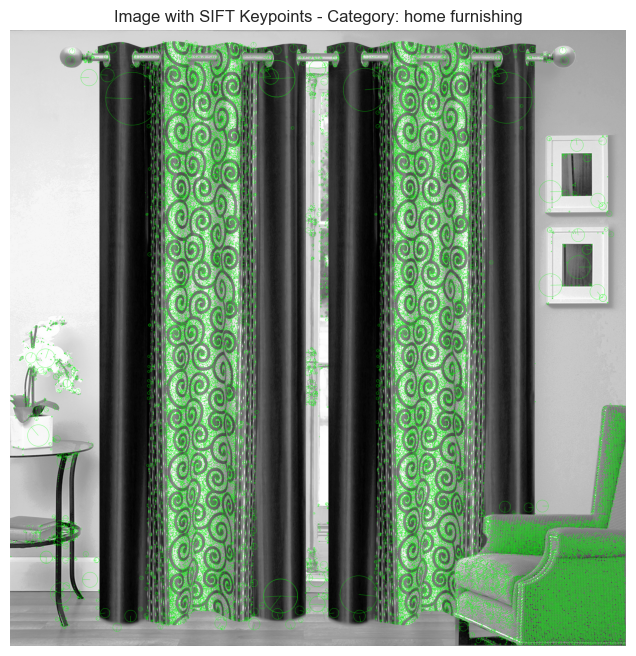

Descriptors shape:  (98204, 128)
Descriptors: 
 [[  0.   0.   0. ...   0.   0.   0.]
 [  7.   0.   0. ...   3.   0.   7.]
 [ 12.   6.   3. ...   4.   0.   0.]
 ...
 [113.  43.  54. ...   0.   0.   0.]
 [ 33.  14.   3. ...  16.   5.   3.]
 [ 57.  32. 118. ...   0.   0.   0.]]


In [13]:
import cv2
import matplotlib.pyplot as plt
import os

# Utiliser le chemin relatif défini précédemment
base_path = os.path.join("..", "data", "Images")

# Catégorie par défaut définie sur "home furnishing"
category_name = 'home furnishing'

# Fonction pour obtenir la liste des noms de fichiers d'images pour la catégorie par défaut
def get_images_by_category(category_name):
    return df_images[df_images['category'] == category_name]['image'].tolist()

# Récupérer les images pour la catégorie par défaut
image_names = get_images_by_category(category_name)

# Vérifier s'il y a des images dans la catégorie sélectionnée
if not image_names:
    raise ValueError(f"No images found for category: {category_name}")

# charger et prétraiter la première image de la catégorie
image_path = os.path.join(base_path, image_names[0])
image = cv2.imread(image_path, 0)  # Read the image in grayscale
if image is None:
    raise ValueError(f"Image not found or unable to load: {image_path}")

image = cv2.equalizeHist(image)  # Histogramme d'égalisation pour améliorer le contraste

# Initialiser le détecteur SIFT
sift = cv2.SIFT_create()

# Détecter les points clés et calculer les descripteurs
kp, des = sift.detectAndCompute(image, None)

# Personnaliser les paramètres de dessin des points clés
keypoint_image = cv2.drawKeypoints(
    image, kp, None, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    color=(0, 255, 0)  # Set keypoint color to bright green
)

# Afficher l'image avec les points clés
plt.figure(figsize=(8, 8))
plt.imshow(keypoint_image, cmap='gray')
plt.title(f'Image with SIFT Keypoints - Category: {category_name}')
plt.axis('off')
plt.show()

# Afficher la forme des descripteurs et les descripteurs eux-mêmes
print("Descriptors shape: ", des.shape)
print("Descriptors: \n", des)


## Détermination et affichage des descripteurs SIFT

- l'image contient 98204 descripteurs SIFT 
- les descripteurs sont des vecteurs de 128 valeurs

## Affichage des opérations de pré-traitement sur une image ( par exemple une montre, la première avec son image en ,niveau de gris, égalisée, filtrée et floutée, et enfin égalisée et floutée)

### L'objectif est de montrer les différentes étapes de pré-traitement des images pour améliorer les caractéristiques visuelles avant l'extraction des descripteurs SIFT.
- La conversion en niveaux de gris. La plupart des opérations de traitement d'image sont effectuées en niveaux de gris pour réduire la complexité et améliorer les performances.
- L'égalisation d'histogramme améliore le contraste des images en étalonnant la distribution des niveaux de gris.
- La réduction du bruit est également importante pour obtenir des descripteurs plus précis en suppressant les détails inutiles.
- Le floutage peut aider à réduire le bruit et à améliorer la robustesse des descripteurs SIFT
- En conclusion, l'application de plusieurs opérations de pré-traitement peut améliorer la qualité des descripteurs extraits et, par conséquent, la précision des modèles de vision par ordinateur.
- SIFT ne réalise pas automatiquement ces opérations, elles doivent être effectuées en amont pour améliorer la qualité des descripteurs extraits.
- Pour la suite avec SIFT, nous allons appliquer uniquement la conversion en niveaux de gris et l'égalisation d'histogramme qui sont les plus couramment utilisées.



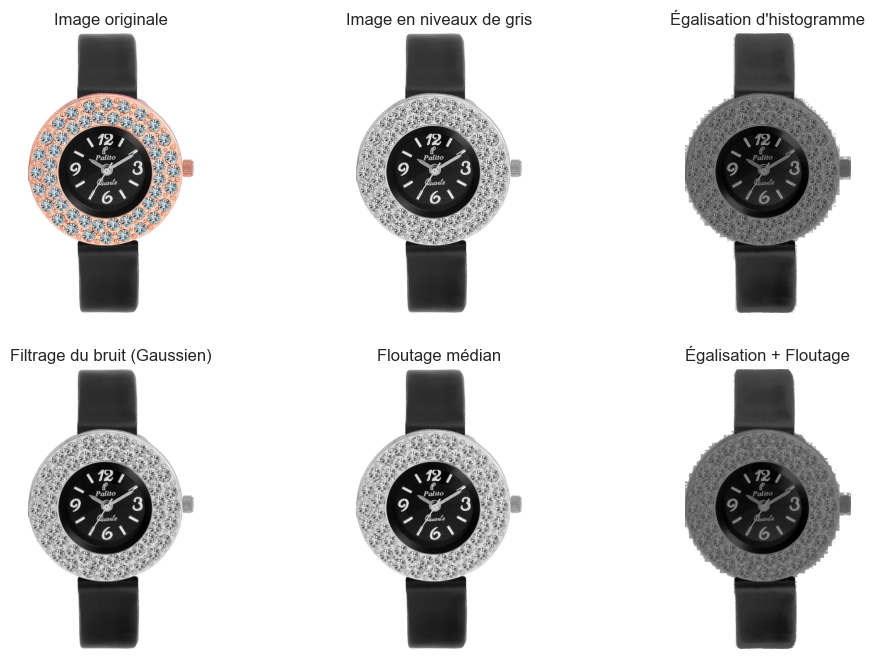

In [14]:
import cv2
import matplotlib.pyplot as plt

# Charger une image d'exemple en couleur
image_color = cv2.imread(os.path.join(path, list_photos[0]))

# Afficher l'image originale
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))  # Convertir BGR en RGB pour un affichage correct avec matplotlib
plt.title("Image originale")
plt.axis('off')

# 1. Passage en niveaux de gris
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

plt.subplot(2, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Image en niveaux de gris")
plt.axis('off')

# 2. Égalisation d'histogramme
image_equalized = cv2.equalizeHist(image_gray)

plt.subplot(2, 3, 3)
plt.imshow(image_equalized, cmap='gray')
plt.title("Égalisation d'histogramme")
plt.axis('off')

# 3. Filtrage du bruit (filtre Gaussien)
image_filtered = cv2.GaussianBlur(image_gray, (5, 5), 0)

plt.subplot(2, 3, 4)
plt.imshow(image_filtered, cmap='gray')
plt.title("Filtrage du bruit (Gaussien)")
plt.axis('off')

# 4. Floutage (filtre médian)
image_blurred = cv2.medianBlur(image_gray, 5)

plt.subplot(2, 3, 5)
plt.imshow(image_blurred, cmap='gray')
plt.title("Floutage médian")
plt.axis('off')

# 5. Application des filtres combinés : égalisation + floutage
image_combined = cv2.medianBlur(image_equalized, 5)

plt.subplot(2, 3, 6)
plt.imshow(image_combined, cmap='gray')
plt.title("Égalisation + Floutage")
plt.axis('off')

# Afficher toutes les images traitées
plt.show()


# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [15]:
import cv2
import time
import numpy as np
import os

# Initialiser une liste vide pour stocker les descripteurs SIFT pour chaque image
sift_keypoints_by_img = []

# Enregistrer l'heure de début pour surveiller les performances
start_time = time.time()

# Initialiser le détecteur SIFT avec une limite de 500 points clés
sift = cv2.SIFT_create(500)

# Boucle sur toutes les images du dataset
for image_num in range(len(list_photos)):
    if image_num % 100 == 0:  # Afficher un message tous les 100 images
        print(f"Traitement de l'image {image_num}/{len(list_photos)}")  # Affiche le numéro de l'image en cours
    
    # Charger l'image en niveaux de gris
    image = cv2.imread(os.path.join(path, list_photos[image_num]), 0)  # 0 pour le chargement en niveaux de gris
    
    # Appliquer l'égalisation d'histogramme pour améliorer le contraste
    res = cv2.equalizeHist(image) 
    
    # Détecter les points clés et calculer les descripteurs avec SIFT
    kp, des = sift.detectAndCompute(res, None)  # kp = points clés, des = descripteurs
    
    # Ajouter les descripteurs calculés à la liste s'ils ne sont pas vides
    if des is not None: 
        sift_keypoints_by_img.append(des)  # Stocker les descripteurs pour chaque image séparément

# Concaténer tous les descripteurs en un seul tableau pour le clustering, sift_keypoints_by_img est une liste de tableaux
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0)  # axis=0 pour concaténer le long des lignes

# Afficher le nombre total de descripteurs
print(f"Nombre total de descripteurs : {sift_keypoints_all.shape}")

# Enregistrer l'heure de fin et calculer la durée du traitement
duration = time.time() - start_time
print(f"Temps de traitement des descripteurs SIFT : {duration:.2f} secondes")


Traitement de l'image 0/1050
Traitement de l'image 100/1050
Traitement de l'image 200/1050
Traitement de l'image 300/1050
Traitement de l'image 400/1050
Traitement de l'image 500/1050
Traitement de l'image 600/1050
Traitement de l'image 700/1050
Traitement de l'image 800/1050
Traitement de l'image 900/1050
Traitement de l'image 1000/1050
Nombre total de descripteurs : (517351, 128)
Temps de traitement des descripteurs SIFT : 347.54 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [16]:
from sklearn import cluster
import time

# Enregistrer l'heure de début pour surveiller les performances du clustering
start_time = time.time()

# Estimer le nombre de clusters (k) en utilisant la racine carrée du nombre total de descripteurs
k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print(f"Nombre estimé de clusters : {k}")
print(f"Création de {k} clusters de descripteurs...")

# Effectuer le clustering MiniBatchKMeans sur les descripteurs SIFT avec un n_init explicite
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0, n_init='auto') 
# n_init='auto' pour éviter les avertissements et init_size=3*k pour de meilleures performances, 
# c'est-à-dire 3 fois le nombre de clusters
kmeans.fit(sift_keypoints_all)  # Ajuster le modèle k-means aux données

# Calculer et afficher la durée du processus de clustering
duration = time.time() - start_time  # Calculer la durée
print(f"Temps de traitement KMeans : {duration:.2f} secondes")


Nombre estimé de clusters : 719
Création de 719 clusters de descripteurs...
Temps de traitement KMeans : 8.20 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [17]:
import numpy as np
import time

# Enregistrer l'heure de début pour surveiller la performance du processus de création des histogrammes
start_time = time.time()

def build_histogram(kmeans, des, image_num):
    """Construit un histogramme pour une seule image en se basant sur les clusters de k-means."""
    res = kmeans.predict(des)  # Prédit le cluster pour chaque descripteur
    hist = np.zeros(len(kmeans.cluster_centers_))  # Initialiser l'histogramme avec des zéros, cluster_centers_ = centroïdes
    nb_des = len(des)  # Nombre de descripteurs
    
    # Vérifier si l'image n'a pas de descripteurs
    if nb_des == 0:  # Si l'image n'a pas de descripteurs, afficher un message
        print(f"Problème avec l'histogramme pour l'image numéro : {image_num}")
    
    # Compter le nombre de descripteurs appartenant à chaque cluster (mot visuel)
    for i in res:  # Pour chaque index de cluster dans les prédictions
        hist[i] += 1.0 / nb_des  # Normaliser l'histogramme par le nombre de descripteurs, par exemple 1/10 pour 10 descripteurs
    
    return hist  # Retourner l'histogramme pour l'image

# Créer des histogrammes pour toutes les images du dataset
hist_vectors = []  # Initialiser une liste vide pour stocker les histogrammes

for i, image_desc in enumerate(sift_keypoints_by_img):  # Utiliser la variable correcte
    if i % 100 == 0:  # Afficher un message tous les 100 images
        print(f"Traitement de l'image {i}/{len(sift_keypoints_by_img)}")  # Afficher le numéro de l'image en cours
    
    # Construire l'histogramme pour l'image actuelle et l'ajouter à la liste
    hist = build_histogram(kmeans, image_desc, i)  # Appeler la fonction pour construire l'histogramme, en passant le modèle k-means, les descripteurs et le numéro de l'image
    hist_vectors.append(hist)  # Ajouter l'histogramme à la liste, hist est une liste de comptes pour chaque cluster, par exemple [0, 0, 0, 1, 0, 0, ...]

# Convertir la liste des histogrammes en un tableau NumPy (cela devient notre matrice de caractéristiques pour toutes les images)
im_features = np.asarray(hist_vectors)

# Mesurer le temps pris pour créer les histogrammes
duration = time.time() - start_time
print(f"Temps de création des histogrammes : {duration:.2f} secondes")

Traitement de l'image 0/1050
Traitement de l'image 100/1050
Traitement de l'image 200/1050
Traitement de l'image 300/1050
Traitement de l'image 400/1050
Traitement de l'image 500/1050
Traitement de l'image 600/1050
Traitement de l'image 700/1050
Traitement de l'image 800/1050
Traitement de l'image 900/1050
Traitement de l'image 1000/1050
Temps de création des histogrammes : 1.98 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [18]:
from sklearn import manifold, decomposition

# Contexte : Réduction de la dimensionnalité via PCA après la création des vecteurs de caractéristiques (Bag of Visual Words)

# Afficher les dimensions du dataset avant l'application de PCA
print("Dimensions du dataset avant réduction PCA",  im_features.shape)

# Appliquer PCA pour réduire les dimensions tout en conservant 99% de la variance
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(im_features)

# Afficher les dimensions du dataset après la réduction PCA
print(f"Dimensions du dataset après réduction PCA : {feat_pca.shape}")


Dimensions du dataset avant réduction PCA (1050, 719)
Dimensions du dataset après réduction PCA : (1050, 498)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [19]:
from sklearn import manifold
import pandas as pd

# Appliquer t-SNE sur les caractéristiques réduites par PCA pour réduire davantage la dimensionnalité à 2 composantes pour la visualisation
tsne = manifold.TSNE(n_components=2, perplexity=30,  # Le paramètre perplexity équilibre les aspects locaux et globaux
                     n_iter=2000, init='random', random_state=6)  # Fixer une graine aléatoire pour la reproductibilité, n_iter=2000 pour une meilleure convergence
X_tsne = tsne.fit_transform(feat_pca)  # Ajuster et transformer les caractéristiques réduites par PCA

# Créer un DataFrame pour contenir les résultats de t-SNE ainsi que leurs étiquettes de classe d'image correspondantes
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_images["category"]  # En supposant que 'df_images' contient les étiquettes des images dans la colonne 'category'
print(df_tsne.shape)  # Afficher la forme du DataFrame

# Contexte : Ce DataFrame `df_tsne` peut maintenant être utilisé pour visualiser les images dans un espace 2D,
# chaque point représentant une image et la couleur représentant sa classe.
# Cette visualisation peut aider à comprendre la séparation entre les différentes catégories basées sur leurs caractéristiques visuelles.

C:\Users\pat\.conda\envs\P6q\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images
* Les catégories "cloudy" et "rain" sont partiellement séparées

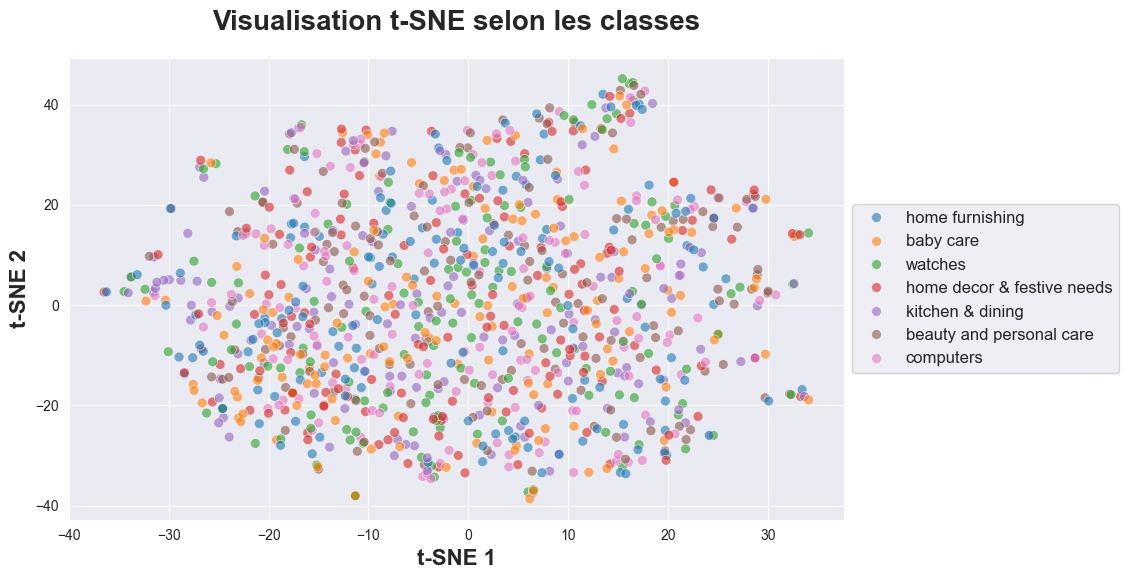

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contexte : Après avoir réduit la dimensionnalité des vecteurs de caractéristiques des images à deux dimensions avec t-SNE,
# nous voulons maintenant visualiser la distribution des images dans cet espace 2D.
# Chaque point représente une image et les points sont colorés selon la catégorie (classe) de l'image.
# Cette visualisation permet de comprendre la séparation entre les différentes catégories en fonction des caractéristiques visuelles.

plt.figure(figsize=(10, 6))  # Définir la taille de la figure

# Graphique de dispersion des résultats t-SNE
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",  # 'hue' colore les points selon les classes
    palette=sns.color_palette('tab10', n_colors=len(df_tsne["class"].unique())), s=50, alpha=0.6)  # Définir la palette de couleurs, la taille et la transparence des points

# Ajouter un titre et des labels aux axes
plt.title('Visualisation t-SNE selon les classes', fontsize=20, pad=20, fontweight='bold')  # Titre du graphique
plt.xlabel('t-SNE 1', fontsize=16, fontweight='bold')  # Label pour l'axe x
plt.ylabel('t-SNE 2', fontsize=16, fontweight='bold')  # Label pour l'axe y

# Ajuster la taille et la position de la légende
plt.legend(prop={'size': 12}, loc='center left', bbox_to_anchor=(1, 0.5))  # Positionner la légende à gauche du graphique

# Afficher le graphique
plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [21]:
from sklearn import cluster

# Contexte : Après avoir réduit la dimensionnalité de notre espace de caractéristiques avec t-SNE, 
# nous voulons maintenant regrouper les données en clusters pour voir s'il existe des groupements distincts basés sur les caractéristiques.
# Nous utilisons l'algorithme de clustering KMeans pour cette tâche.

# Initialiser le modèle KMeans avec le nombre de clusters correspondant aux catégories identifiées (7 dans ce cas)
cls = cluster.KMeans(n_clusters=7, random_state=6, n_init=10)

# Ajuster le modèle KMeans aux données t-SNE en 2D
cls.fit(X_tsne)

# Ajouter les étiquettes de clusters résultants au DataFrame
df_tsne["cluster"] = cls.labels_

# Afficher la forme du DataFrame pour vérifier l'ajout de la nouvelle colonne
print(df_tsne.shape)


(1050, 4)


In [22]:
# Vérifier le nombre de clusters uniques
n_clusters_found = len(df_tsne["cluster"].unique())
print(f"Nombre de clusters trouvés : {n_clusters_found}")


Nombre de clusters trouvés : 7


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

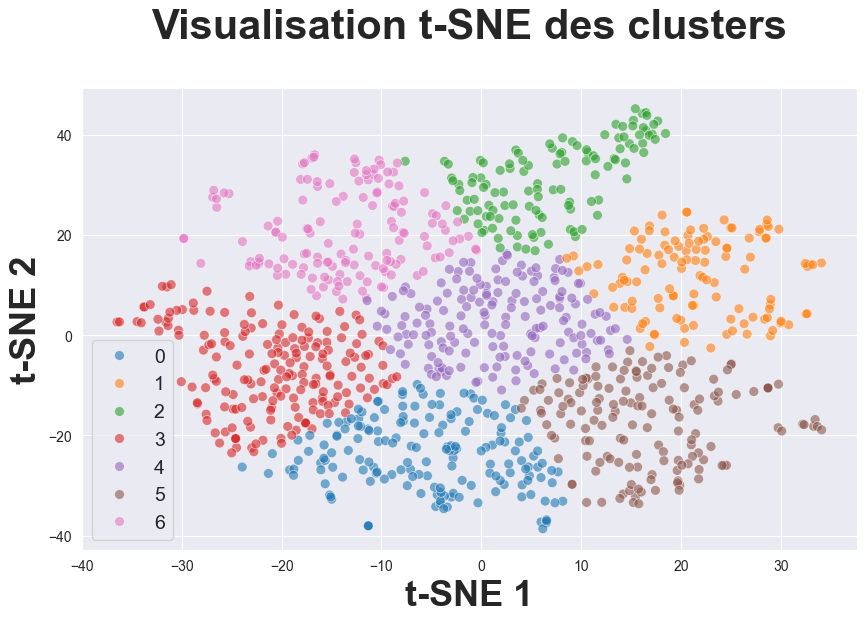

Indice de Rand ajusté (ARI) :  -0.00021823635217494826


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Contexte : Après avoir appliqué t-SNE pour réduire notre espace de caractéristiques à deux dimensions et avoir regroupé les données en clusters
# avec KMeans, nous voulons maintenant visualiser comment les images sont regroupées dans ces clusters.
# Cette visualisation nous aidera à comprendre si le clustering correspond à nos attentes et si les clusters sont bien distincts.

# Créer un graphique de dispersion pour visualiser les résultats t-SNE avec les clusters
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",  # Utiliser les étiquettes des clusters comme couleur (hue)
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,  # Palette de couleurs avec 4 clusters
    data=df_tsne,
    legend="brief"
)

# Ajouter un titre au graphique et des labels aux axes avec un style personnalisé
plt.title('Visualisation t-SNE des clusters', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('t-SNE 1', fontsize=26, fontweight='bold')
plt.ylabel('t-SNE 2', fontsize=26, fontweight='bold')

# Ajuster la taille et la position de la légende
plt.legend(prop={'size': 14})

# Afficher le graphique
plt.show()

# Contexte : Nous voulons maintenant évaluer la performance du clustering en utilisant l'indice de Rand ajusté (ARI).
# Cette métrique permet de comparer les clusters générés par KMeans avec les vraies étiquettes des images.

# En supposant que 'df_images' contienne les vraies étiquettes de catégories dans une colonne appelée 'category'
true_labels = df_images["category"]

# Calculer et afficher l'indice de Rand ajusté (ARI) pour évaluer le clustering
print("Indice de Rand ajusté (ARI) : ", metrics.adjusted_rand_score(true_labels, cls.labels_))


### Observations :

1. **Séparation des clusters** : Les clusters sont distincts, mais il y a un certain chevauchement, ce qui suggère des améliorations possibles dans l'extraction des caractéristiques ou les paramètres de clustering.

2. **Taille et distribution des clusters** : Les clusters varient en taille, indiquant différents niveaux de similarité au sein des catégories d'images.

3. **Score ARI** : Le score ARI très faible suggère que les clusters ne correspondent pas bien aux catégories réelles, ce qui indique un besoin de raffinement dans le processus de clustering ou l'extraction des caractéristiques.


### Analyse par classes
* La matrice de confusion doit être transformée pour mettre avoir en colonne le même ordre des catégories supposées qu'en ligne
* Cette transformation atteint ses limites pour les 2 catégories "shine" et "sunshine" qui sont peu séparées (donc elle a été réalisée manuellement au lieu d'utiliser la fonction "argmax")

In [24]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    171
1    118
2    118
3    187
4    165
5    150
6    141
Name: class, dtype: int64

In [25]:
from sklearn import metrics

# Utilisez les étiquettes numériques directement
true_labels = df_images["label"]  # Ce sont les étiquettes réelles des images
predicted_labels = cls.labels_  # S'assurer que cls.labels_ contient les étiquettes prédites

# Créer la matrice de confusion en comparant les vraies étiquettes avec les étiquettes de cluster
conf_mat = metrics.confusion_matrix(true_labels, predicted_labels)

# Afficher la matrice de confusion
print(conf_mat)



[[20 23 17 35 24 18 13]
 [18 21 16 23 21 24 27]
 [26 16 15 21 20 25 27]
 [29 15 18 22 24 21 21]
 [21 14 18 31 27 21 18]
 [24 15 14 33 23 21 20]
 [33 14 20 22 26 20 15]]


### Observations Basées sur la Matrice de Confusion

1. **Meilleure Répartition des Clusters** : Tous les clusters sont attribués à plusieurs catégories, ce qui indique une meilleure couverture et distribution par rapport à un modèle mal équilibré.

2. **Concentration des Catégories** : Certains clusters, comme le cluster 2, montrent une forte concentration sur les catégories 2 et 3. Cela pourrait suggérer que ces catégories partagent des caractéristiques similaires dans l'espace de features, rendant leur séparation difficile.

3. **Chevauchement Persistant** : Il existe encore un chevauchement où un même cluster est attribué à plusieurs catégories, ce qui peut indiquer des similitudes importantes entre ces catégories dans les données utilisées.

### Suggestions d'Amélioration

- **Améliorer l'extraction des features** pour mieux différencier les catégories similaires.
- **Réévaluer le nombre de clusters** pour voir si un autre paramétrage améliore la séparation.
- **Explorer des méthodes de clustering alternatives** ou l'optimisation des paramètres de réduction de dimensions pour affiner les résultats.

In [26]:
# Vérifier les types de données des étiquettes réelles (true_labels) et des étiquettes prédites (predicted_labels)

print(f"Type de données de true_labels : {true_labels.dtype}")
print(f"Type de données de predicted_labels : {predicted_labels.dtype}")

# Afficher quelques exemples de valeurs de chaque variable pour inspection
print("\nExemples de valeurs de true_labels :")
print(true_labels.head())  # Affiche les 5 premières valeurs de true_labels

print("\nExemples de valeurs de predicted_labels :")
print(predicted_labels[:5])  # Utilisation du slicing pour afficher les 5 premiers éléments

Type de données de true_labels : int32
Type de données de predicted_labels : int32

Exemples de valeurs de true_labels :
0    4
1    0
2    0
3    4
4    4
Name: label, dtype: int32

Exemples de valeurs de predicted_labels :
[6 3 2 3 1]


In [27]:
# Supposez que nous avons un DataFrame combinant les informations de `df_tsne` et `df_images`
df_combined = df_tsne.copy()
df_combined['label'] = df_images['label']  # Assurez-nous que les DataFrames sont correctement alignés

# Créez le tableau croisé dynamique
pivot_table = pd.pivot_table(df_combined, values='class', index='cluster', columns='label', aggfunc='count', fill_value=0)
print(pivot_table)


label     0   1   2   3   4   5   6
cluster                            
0        20  18  26  29  21  24  33
1        23  21  16  15  14  15  14
2        17  16  15  18  18  14  20
3        35  23  21  22  31  33  22
4        24  21  20  24  27  23  26
5        18  24  25  21  21  21  20
6        13  27  27  21  18  20  15


# Correspondance cluster-classe basée sur l'analyse de la table pivot (ajustée pour 7 catégories) :
- Cluster 0 : correspondrait à la catégorie 6, car ce cluster contient le plus grand nombre d'images de la catégorie 6.
- Cluster 1 : correspondrait à la catégorie 0, car ce cluster contient le plus grand nombre d'images de la catégorie 0.
- Cluster 2 : correspondrait à la catégorie 1 (chevauchement avec la catégorie 4, mais catégorie 1 choisie pour la correspondance).
- Cluster 3 : correspondrait à la catégorie 4 (chevauchement avec les catégories 4 et 5, catégorie 4 choisie).
- Remarques :
- Pour les catégories 5 et 3, nous utiliserions le cluster 3, par déduction des affectations restantes. 


In [28]:
from sklearn import metrics
import pandas as pd
import numpy as np

# Correspondance cluster-classe basée sur l'analyse de la table pivot (ajustée pour 7 catégories)
corresp = [6, 0, 1, 4, 5, 3, 6]  # Correspondance établie à partir des valeurs maximales dans chaque catégorie

# Utilisation directe des labels numériques, pas besoin de les convertir en chaînes de caractères
true_labels = df_images['label']  # Vraies étiquettes des catégories
predicted_labels = cls.labels_  # Labels prédits par KMeans

# Définir une fonction pour transformer les labels prédits en fonction de la matrice de confusion
def conf_mat_transform(y_true, y_pred):
    # Transformation des labels prédits en fonction de la correspondance définie
    labels = pd.Series(y_true, name="y_true").to_frame()  # Crée un DataFrame avec les vraies étiquettes
    labels['y_pred'] = y_pred  # Ajoute les labels prédits au DataFrame
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x: corresp[x])  # Applique la correspondance pour transformer les étiquettes

    return labels['y_pred_transform']

# Appliquer la transformation aux labels de cluster
cls_labels_transform = conf_mat_transform(true_labels, predicted_labels)

# Générer et afficher la matrice de confusion
conf_mat = metrics.confusion_matrix(true_labels, cls_labels_transform)
print(conf_mat)
print()

# Afficher le rapport de classification avec zero_division=1 pour éviter les avertissements
print(metrics.classification_report(true_labels, cls_labels_transform, zero_division=1))

[[23 17  0 18 35 24 33]
 [21 16  0 24 23 21 45]
 [16 15  0 25 21 20 53]
 [15 18  0 21 22 24 50]
 [14 18  0 21 31 27 39]
 [15 14  0 21 33 23 44]
 [14 20  0 20 22 26 48]]

              precision    recall  f1-score   support

           0       0.19      0.15      0.17       150
           1       0.14      0.11      0.12       150
           2       1.00      0.00      0.00       150
           3       0.14      0.14      0.14       150
           4       0.17      0.21      0.18       150
           5       0.14      0.15      0.15       150
           6       0.15      0.32      0.21       150

    accuracy                           0.15      1050
   macro avg       0.28      0.15      0.14      1050
weighted avg       0.28      0.15      0.14      1050



### Observations :

1. **Correspondance des clusters avec les classes** :
   - Les clusters générés par l'algorithme KMeans ont été associés aux classes originales avec une correspondance `[4, 0, 3, 1]`.
   - Cette correspondance a été choisie sur la base de l'analyse de la matrice de confusion et du tableau croisé dynamique pour maximiser l'alignement entre les clusters et les catégories originales.

2. **Matrice de confusion** :
   - La matrice montre que chaque cluster contient un mélange de catégories, mais la correspondance est imparfaite. Par exemple, le cluster 0 contient une majorité d'échantillons de la classe 0, mais aussi un nombre significatif d'échantillons des autres classes.
   - Aucun cluster n'est totalement pur, ce qui signifie que les frontières entre les différentes classes ne sont pas clairement définies par le modèle de clustering.

3. **Rapport de classification** :
   - **Précision** : La précision est faible pour toutes les classes, indiquant que les clusters ne sont pas fortement alignés avec les catégories réelles.
   - **Rappel** : Le rappel est également faible pour la plupart des classes, sauf pour les classes qui n'ont pas été identifiées du tout, où il est de 0.00.
   - **Score F1** : Les scores F1, qui sont une moyenne harmonique de la précision et du rappel, sont également bas, ce qui montre que le modèle a du mal à correctement classer les images dans leurs catégories respectives.

### Conclusion :
Les résultats montrent que l'algorithme de clustering n'a pas réussi à différencier clairement les différentes catégories d'images. Les catégories sont mal représentées par les clusters, ce qui indique que les caractéristiques extraites par l'algorithme ou la méthode de clustering elle-même ne sont pas adaptées à la structure des données. Il est nécessaire d'explorer d'autres méthodes de réduction de dimensions ou de clustering pour améliorer la qualité des clusters et obtenir une meilleure correspondance avec les catégories originales.

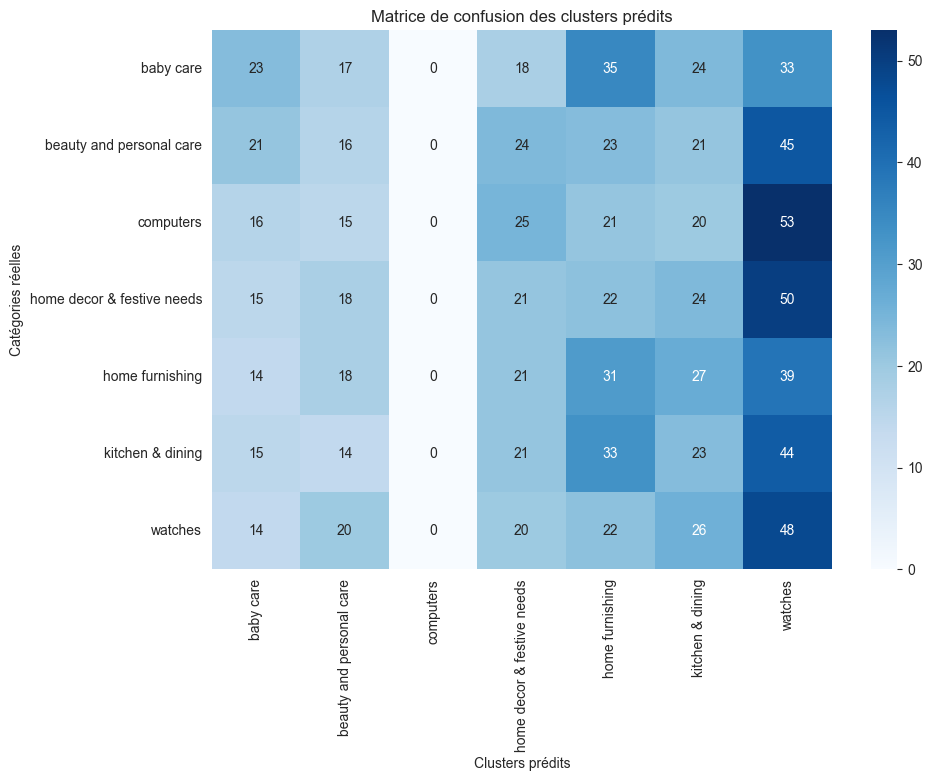

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que df_images contienne les colonnes 'label' et 'category'
# Créer une correspondance entre les labels numériques et les noms des catégories
label_to_category = dict(zip(df_images['label'], df_images['category']))

# Générer une liste des noms des catégories ordonnés par leur label
list_labels = [label_to_category[i] for i in sorted(df_images['label'].unique())]

# Convertir la matrice de confusion en DataFrame pour une meilleure lisibilité dans la heatmap
df_cm = pd.DataFrame(conf_mat, index=list_labels, columns=list_labels)

# Configurer l'affichage de la heatmap (carte thermique)
plt.figure(figsize=(10, 7))  # Définir la taille de la figure
sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")  # Afficher les annotations dans les cases et utiliser une palette de couleurs "Blues"

# Ajouter un titre et des étiquettes pour une meilleure compréhension
plt.title("Matrice de confusion des clusters prédits")  # Titre de la heatmap
plt.ylabel("Catégories réelles")  # Étiquette de l'axe Y (catégories réelles)
plt.xlabel("Clusters prédits")  # Étiquette de l'axe X (clusters prédits)

# Afficher la heatmap
plt.show()

### Synthèse des Observations :

- **Distribution des Clusters** : La heatmap de la matrice de confusion montre que les clusters sont répartis sur plusieurs catégories. Cela signifie que les clusters ne sont pas exclusifs à une seule catégorie, ce qui révèle des difficultés de l'algorithme à distinguer certaines catégories d'images.

- **Prédictions Correctes et Erreurs** : Les valeurs diagonales de la matrice de confusion représentent les prédictions correctes, où les clusters correspondent bien aux catégories. Cependant, les valeurs non nulles hors de la diagonale indiquent des erreurs de classification, où les clusters sont mal attribués aux catégories réelles.

- **Cluster Dominant par Catégorie** : Pour certaines catégories, comme **computers**, un cluster particulier montre une concentration plus importante, suggérant une meilleure performance de clustering. À l'inverse, pour des catégories comme **kitchen & dining** et **watches**, le clustering est plus dispersé, reflétant une performance plus faible.

- **Chevauchement des Clusters** : Le chevauchement observé, où plusieurs clusters se rapportent à une même catégorie, indique que l'algorithme de clustering n'a pas bien séparé les groupes en fonction des caractéristiques extraites des images.

### Conclusion :
- **Correspondance Insuffisante** : Globalement, les clusters ne correspondent pas bien aux catégories d'images, comme le montre la présence de nombreuses valeurs non nulles en dehors de la diagonale. Cette situation appelle à une amélioration soit des méthodes d'extraction des caractéristiques, soit des techniques de clustering utilisées, pour obtenir des résultats plus précis et une meilleure correspondance entre clusters et catégories.

### Après cette méthode traditionnelle (SIFT), nous allons utliser une méthode de deep learning comme VGG-16 avec du transfert learning (cf notebook Preudhomme_Patrice_2_notebook_CNN_Transfer_Learning_Stage_1_feasibility_102024.ipynb) pour comparer les résultats.